# Student Id : 18203485
# Student Name : Fergus Mc Hale

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# Other Imports
import pandas as pd # read dataframe
from sklearn.utils import shuffle #shuffle dataset
from sklearn.model_selection import train_test_split # split of data to avoid data snooping
from sklearn.preprocessing import PolynomialFeatures #find the best features
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

# Task 4  (CE6002)

* Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible classification of the data set Task4.csv. Your classification performance should improve if you add some new features.
* Also, use an algorithm from the scikit-learn toolbox to see if you can do better. You should not add any other imports than those necessary for your chosen scikit-learn algorithm.

In [2]:
df = pd.read_csv("./Task4.csv")

In [3]:
df.shape

(100, 2)

In [4]:
df.head(5)

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [5]:
X = df['X'].values
print (X.shape)

(100,)


In [6]:
y = df['y'].values
print (y.shape)

(100,)


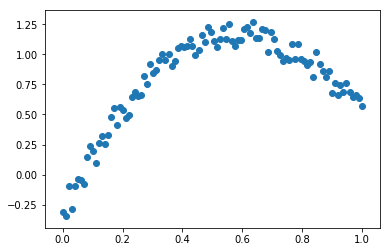

In [7]:
plt.scatter(X, y)

In [8]:
# basing on vipuls approach that made the most common sense code wise and is more suitable to a machine learner
class linearmodel(object):
    def __init__(self, selection):
        if selection == "classification":
            self.is_classifier = True
        elif selection == "regression":
            self.is_classifier = False
            
    def fit(self, X, y):
        X_inverse = np.linalg.pinv(X) 
        w_lin = np.matmul(X_inverse, y)
        self.coef_ = w_lin
        
    def product(self,X):
        return (np.dot(X, np.transpose(self.coef_)))
    
    def predict(self, X):
        # Linear classification i.e h(x) - Sign(wTx) 
        # Hard Threashold due to Sign
        if self.is_classifier == True:
            return np.sign(self.product(X))
        
        # Linear Regression i.e h(x) = wTx 
        # No Hard Threashold
        elif self.is_classifier == False:
            return self.product(X)
                
def squared_error(actual, expected):
    error_sq = 0
    N = len(actual)
    for i in range(N):
        error_sq += math.pow((actual[i] - expected[i]),2)
    return math.sqrt(error_sq/N)

def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 


def decision_boundary_lin(weights, x_min, x_max):
    return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    return -(weights[0]+weights[1]*x)/weights[2] 

def plot__(X, y, alg,title):
    test_train_ratio = 0.2
    X_shuffled, y_shuffled = shuffle(X, y, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=test_train_ratio, random_state=0)
    
    alg.fit(X_train, y_train)

    minx = np.amin(X_train)
    maxx = np.amax(X_train)
    s = len(X[:,1])
    x_line = np.linspace(minx, maxx, s)
    y_line = calc_polynom(alg.coef_, x_line)
    plt.title(title)
    plt.plot(x_line, y_line)

    
    y_out = alg.predict(X_test)
    error_mse = squared_error(y_out, y_test)
    print("Error = ",error_mse)
    plt.scatter(X[:,1], y, c=y)
    
    # printing the results away from the actual data so that we are able to identify the test/train data correctly
    plt.scatter(X_test[:,1], np.sign(y_out)*2, c=y_test)

Error =  0.33999752513905723


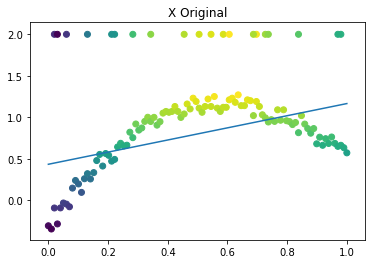

In [9]:
bias = np.ones(len(X))
X_input =  np.c_[bias,X]

linear_model_reg_norm = linearmodel("regression")
plot__(X_input, y.T, linear_model_reg_norm, 'X Original')

Error =  0.40569416159926625


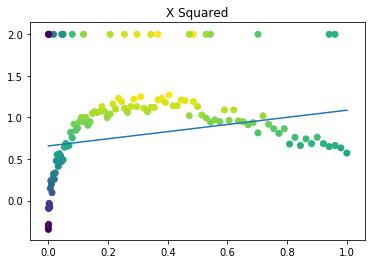

In [10]:
X_sq = np.square(X)

bias = np.ones(len(X))
X_sq_input =  np.c_[bias,X_sq]

linear_model_reg_squared = linearmodel("regression")
plot__(X_sq_input, y.T, linear_model_reg_squared, 'X Squared')

Error =  0.08375752472421742


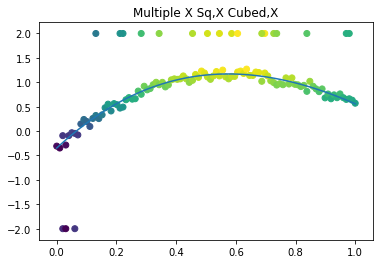

In [11]:
X_cube = np.power(X, 3)
X_cub_input =  np.c_[bias,X, X_sq, X_cube]

linear_model_reg_cubed = linearmodel("regression")
plot__(X_cub_input, y.T, linear_model_reg_cubed, 'Multiple X Sq,X Cubed,X')

R_square score of the model: 0.4645382880058122


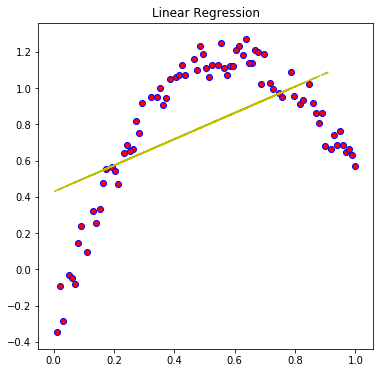

In [12]:
X_input = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
score = model.score(X_test, y_test)

# Plot the regression curve
plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train, c='r', edgecolors='b')
plt.plot(X_test, predictions, 'y-.')

print('R_square score of the model:', score)
plt.title('Linear Regression')
plt.show()

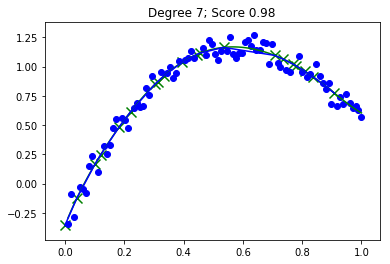

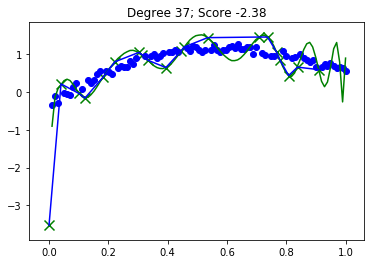

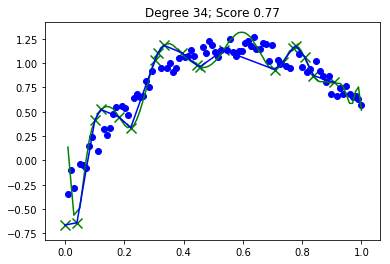

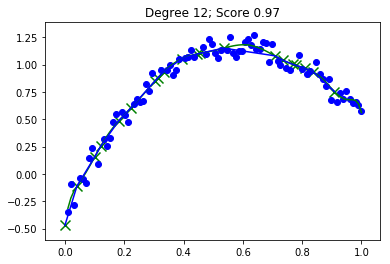

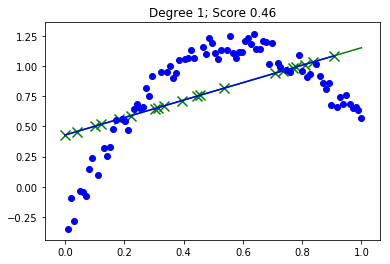

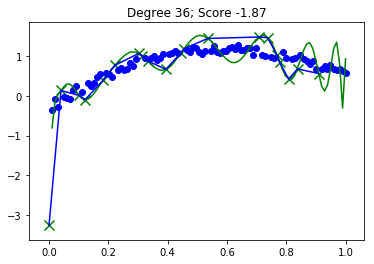

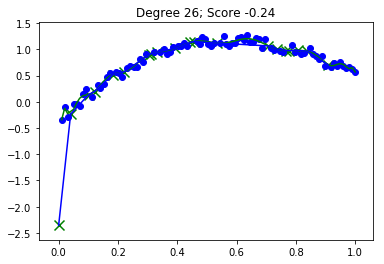

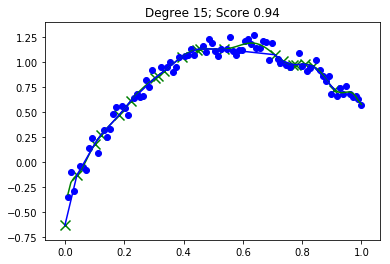

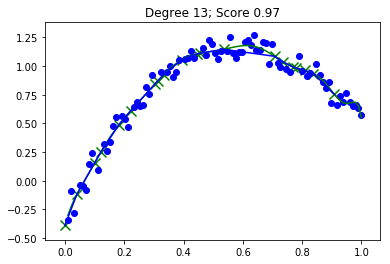

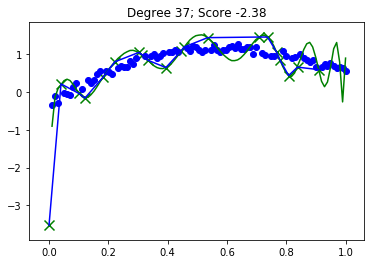

In [14]:
degrees = np.random.randint(40, size=(10)) #initialize random numbers between 1 and 40

X_train, X_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)
rmse = []

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    
    predictions = pipeline.predict(X_test)
    pred_train = pipeline.predict(X_train)
    score = pipeline.score(X_test, y_test)
    
    rmse.append(squared_error(y_test, predictions))
    
    new_X_train, new_y_train = zip(*sorted(zip(X_train, pred_train))) 
    new_X_test, new_y_test = zip(*sorted(zip(X_test, predictions))) 

    # Training
    plt.plot(new_X_train, new_y_train, c='green')

    # Testing
    plt.plot(new_X_test, new_y_test, c='blue')
    plt.scatter(new_X_test, new_y_test, marker='x', s=100, c="green")

    # plot original data
    plt.scatter(X_train, y_train, c='blue')

    plt.title("Degree {}; Score {:.2f}".format(degrees[i], score))
    plt.show()

As seen above by using the Polynomial features and adjusting the degrees with a degree of 0 and a score of -0.03 
we are able to get the same result as X Original where no changes has been made
With a degree of 8 or 9 where get a score of .98 and it captures the line correctly
As new feature were added mainly X Squared and X cubed the line